# Maximum Likelihood Estimation

Considering polynomial regression of the form: $$p(y|\mathbf{x},\mathbf{\theta})=\mathcal{N}(y|\mathbf{\phi}^T(\mathbf{x})\mathbf{\theta}, \sigma^2)$$ $$y=\mathbf{\phi}^T(\mathbf{x})\mathbf{\theta}+\epsilon$$ $$\epsilon\sim\mathcal{N}(0, \sigma^2)$$

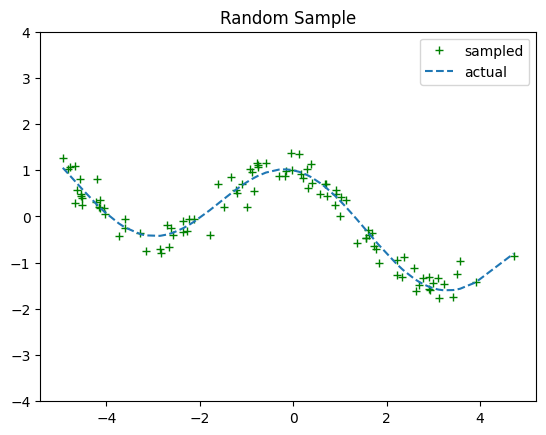

In [1]:
import numpy as np
import matplotlib.pyplot as plt

poly_degree = 4
sample_size = 100
x_pts = np.sort(np.random.uniform(-5, 5, sample_size))

actual = -np.sin(x_pts/5) + np.cos(x_pts)
y_pts = actual + np.random.normal(0, 0.2, sample_size)

fig, ax = plt.subplots()
ax.set_title("Random Sample")
ax.set_ylim([-4, 4])
sampled, = ax.plot(x_pts, y_pts, 'g+', label="sampled")
actual_plt, = ax.plot(x_pts, actual, '--', label="actual")
ax.legend(handles=[sampled, actual_plt], loc="best")

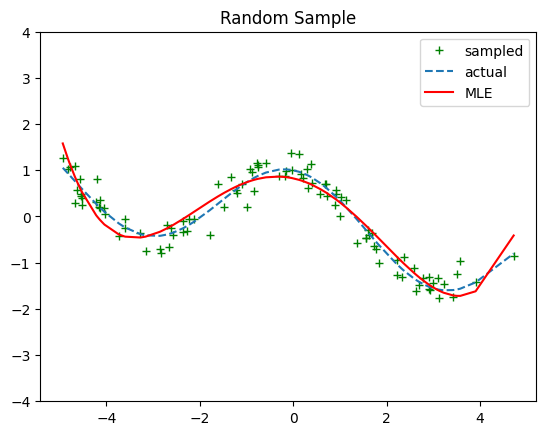

In [2]:
# Build design matrix
Φ = np.array([[x**i for i in range(poly_degree+1)] for x in x_pts])

# Compute parameters
θ = np.linalg.solve(Φ.T@Φ, Φ.T@y_pts)

# Make predictions
y_pred = np.array([Φ[i]@θ for i, _ in enumerate(x_pts)])

fig, ax = plt.subplots()
ax.set_title("Random Sample")
ax.set_ylim([-4, 4])
sampled, = ax.plot(x_pts, y_pts, 'g+', label="sampled")
actual_plt, = ax.plot(x_pts, actual, '--', label="actual")
predicted, = ax.plot(x_pts, y_pred, color='red', label="MLE")
ax.legend(handles=[sampled, actual_plt, predicted], loc="best")

plt.show()

### Underfitting

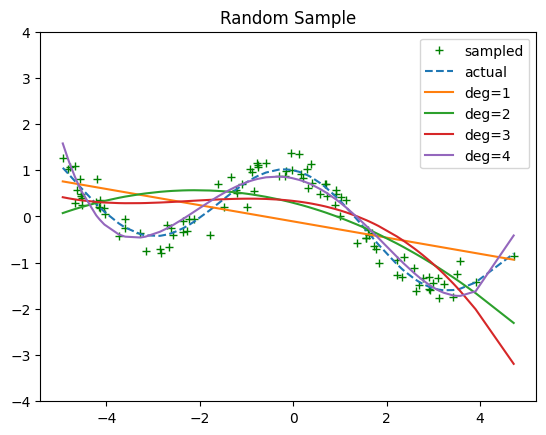

In [3]:
max_degree = 4

fig, ax = plt.subplots()
ax.set_title("Random Sample")
ax.set_ylim([-4,4])
sampled, = ax.plot(x_pts, y_pts, 'g+', label="sampled")
actual_plt, = ax.plot(x_pts, actual, '--', label="actual")
handles = [sampled, actual_plt]
for deg in range(1,max_degree+1):
    # Build design matrix
    Φ = np.array([[x**i for i in range(deg+1)] for x in x_pts])

    # Compute parameters
    θ = np.linalg.solve(Φ.T@Φ, Φ.T@y_pts)

    # Make predictions
    y_pred = np.array([Φ[i]@θ for i, _ in enumerate(x_pts)])

    predicted, = ax.plot(x_pts, y_pred, label=f"deg={deg}")
    handles.append(predicted)
    
ax.legend(handles=handles, loc="best")

plt.show()

### Overfitting
Let's consider the problem of overfitting, where the model hypothesis fits the training data too closely. We'll add a bit more noise in this example.

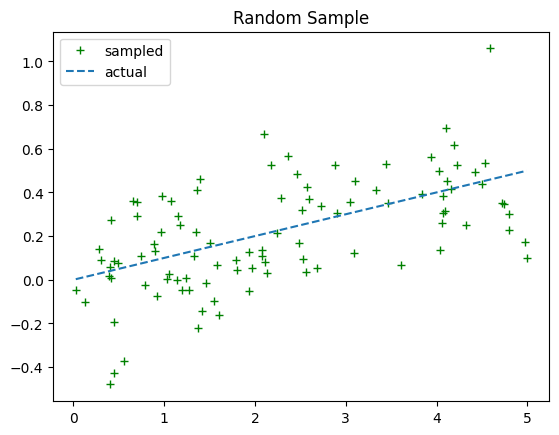

In [4]:
poly_degree = 1
sample_size = 100
x_pts = np.sort(np.random.uniform(0, 5, sample_size))

actual = 0.1 * x_pts
y_pts = actual + np.random.normal(0, 0.2, sample_size)

fig, ax = plt.subplots()
ax.set_title("Random Sample")

sampled, = ax.plot(x_pts, y_pts, 'g+', label="sampled")
actual_plt, = ax.plot(x_pts, actual, '--', label="actual")
ax.legend(handles=[sampled, actual_plt], loc="best")

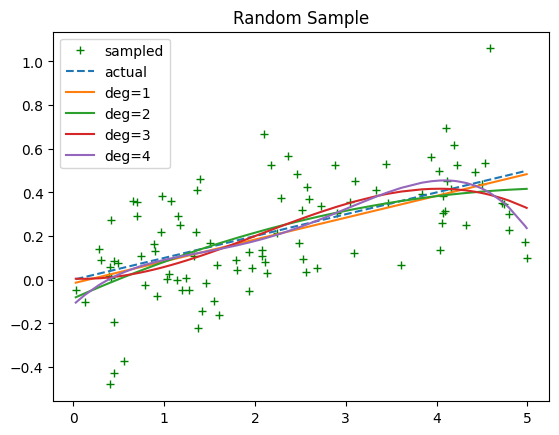

In [5]:
max_degree = 4

fig, ax = plt.subplots()
ax.set_title("Random Sample")
sampled, = ax.plot(x_pts, y_pts, 'g+', label="sampled")
actual_plt, = ax.plot(x_pts, actual, '--', label="actual")
handles = [sampled, actual_plt]
for deg in range(1,max_degree+1):
    # Build design matrix
    Φ = np.array([[x**i for i in range(deg+1)] for x in x_pts])

    # Compute parameters
    θ = np.linalg.solve(Φ.T@Φ, Φ.T@y_pts)

    # Make predictions
    y_pred = np.array([Φ[i]@θ for i, _ in enumerate(x_pts)])

    predicted, = ax.plot(x_pts, y_pred, label=f"deg={deg}")
    handles.append(predicted)
    
ax.legend(handles=handles, loc="best")

plt.show()

# Error Analysis

In order to quantify the "goodness" of a linear regression model, we need to establish a useful metric.

for degree 0, avg parameter magnitude: 0.2604490426518353
for degree 1, avg parameter magnitude: 0.1378926467504097
for degree 2, avg parameter magnitude: 0.17806270011855288
for degree 3, avg parameter magnitude: 0.13703847157845497
for degree 4, avg parameter magnitude: 0.29784245270359
for degree 5, avg parameter magnitude: 0.32172074881975316
for degree 6, avg parameter magnitude: 0.38711539362748404
for degree 7, avg parameter magnitude: 0.4159587666173354
for degree 8, avg parameter magnitude: 0.7990533608970416
for degree 9, avg parameter magnitude: 17.987162938533608


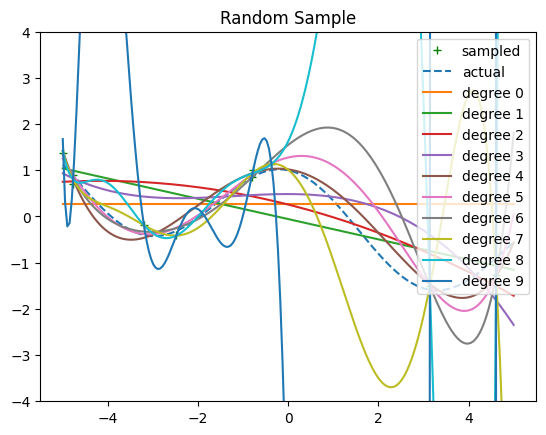

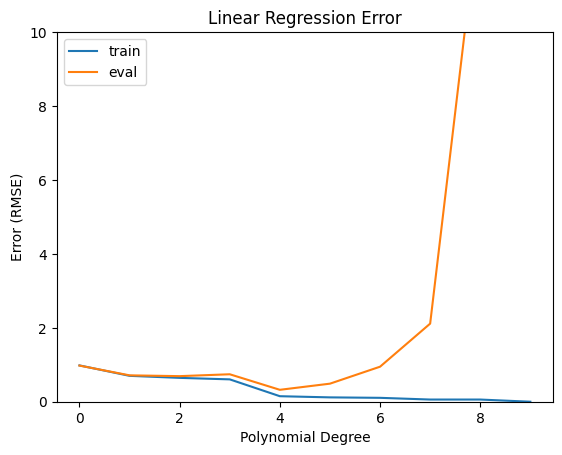

In [6]:
def rmse(y_pred, y):
    N = y_pred.shape[0]
    sigma_ml = 1/N*(y_pred - y).T@(y_pred - y)
    return np.sqrt(sigma_ml)

poly_degree = list(range(10))
sample_size = 10
eval_size = 200
x_pts_sample = np.sort(np.random.uniform(-5, 5, sample_size))

actual = -np.sin(x_pts_sample/5) + np.cos(x_pts_sample)
y_pts_sample = actual + np.random.normal(0, 0.2, sample_size)

fig, ax = plt.subplots()
ax.set_title("Random Sample")
ax.set_ylim([-4, 4])
sampled, = ax.plot(x_pts_sample, y_pts_sample, 'g+', label="sampled")

# Higher res plotting
x_pts = np.linspace(-5, 5, 200)
actual_hr = -np.sin(x_pts/5) + np.cos(x_pts)
actual_plt, = ax.plot(x_pts, actual_hr, '--', label="actual")

eval_actual = -np.sin(x_pts/5) + np.cos(x_pts)
y_pts_eval = eval_actual + np.random.normal(0, 0.2, eval_size)

handles = [sampled, actual_plt]
errors = []
eval_errors = []
for i in poly_degree:
    # Build design matrix
    Φ = np.array([[x**j for j in range(i+1)] for x in x_pts_sample])

    # Compute model parameters
    θ = np.linalg.solve(Φ.T@Φ, Φ.T@y_pts_sample)
    print(f"for degree {i}, avg parameter magnitude: {np.mean(np.abs(θ))}")
    
    y_pred = np.array([Φ[j]@θ for j, _ in enumerate(x_pts_sample)])
    
    # Train Error
    error = rmse(y_pred, y_pts_sample)
    errors.append(error)
    
    # Computing model predictions at each point along domain
    Φ_extended = np.array([[x**j for j in range(i+1)] for x in x_pts])
    
    # Make predictions
    y_pred_extended = np.array([Φ_extended[j]@θ for j, _ in enumerate(x_pts)])
    
    # Eval Error (Measures generalization)
    eval_error = rmse(y_pred_extended, y_pts_eval)
    eval_errors.append(eval_error)
    
    poly_handle, = ax.plot(x_pts, y_pred_extended, label=f"degree {i}")
    handles.append(poly_handle)
    
ax.legend(handles=handles, loc="best")

fig, ax = plt.subplots()
ax.set_title("Linear Regression Error")
ax.set_xlabel("Polynomial Degree")
ax.set_ylabel("Error (RMSE)")
ax.set_ylim([0,10])
train_errors, = ax.plot(poly_degree, errors, label="train")
evaluation_errors, = ax.plot(poly_degree, eval_errors, label="eval")
ax.legend(handles=[train_errors, evaluation_errors], loc="best")

# Maximum A Posteriori (MAP) Estimation

Using the same likelihood as above, but with a prior $$p(\mathbf{\theta})=\mathcal{N}(0, b^2I)$$ and letting $b=1$, we create the corresponding MAP estimate. The new objective that we're minimizing is $$-\log{p(\mathcal{Y}|\mathcal{X},\mathbf{\theta})}-\log{p(\mathbf{\theta})}$$ In this case, the corresponding closed-form solution is $$\mathbf{\theta}_{MAP}=(\Phi^T\Phi+\frac{\sigma^2}{b^2}I_K)^{-1}\Phi\mathbf{y}$$ One final note is that the impact of the prior on the solution is the same as the effect of a regularizer on the maximum likelihood solution.

for degree 3, avg parameter magnitude: 0.023811291427085296
for degree 6, avg parameter magnitude: 0.21476481689313903
for degree 9, avg parameter magnitude: 0.16211557579328523


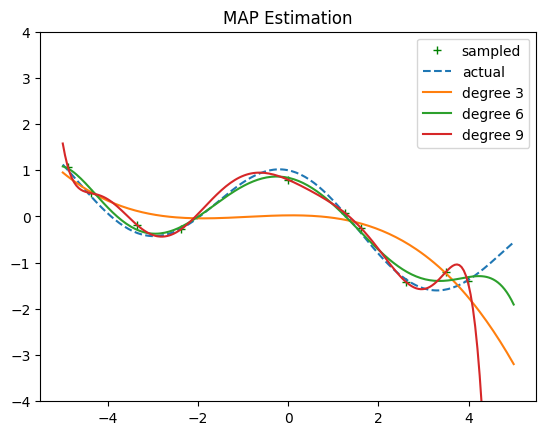

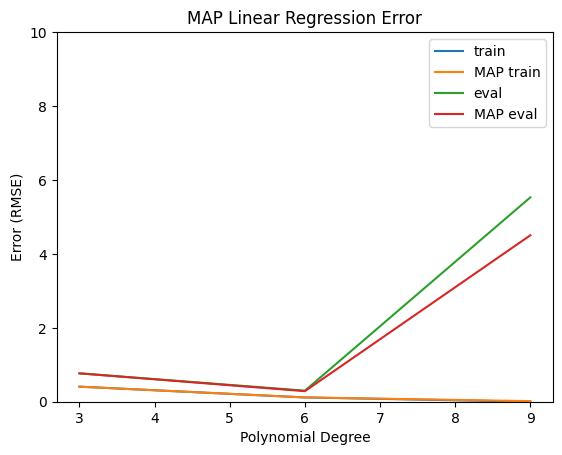

In [24]:
def rmse(y_pred, y):
    N = y_pred.shape[0]
    sigma_ml = 1/N*(y_pred - y).T@(y_pred - y)
    return np.sqrt(sigma_ml)

poly_degree = [3,6,9]
sample_size = 10
eval_size = 200
σ = 0.2
b = 1
x_pts_sample = np.sort(np.random.uniform(-5, 5, sample_size))

actual = -np.sin(x_pts_sample/5) + np.cos(x_pts_sample)
y_pts_sample = actual + np.random.normal(0, σ, sample_size)

fig, ax = plt.subplots()
ax.set_title("MAP Estimation")
ax.set_ylim([-4, 4])
sampled, = ax.plot(x_pts_sample, y_pts_sample, 'g+', label="sampled")

# Higher res plotting
x_pts = np.linspace(-5, 5, 200)
actual_hr = -np.sin(x_pts/5) + np.cos(x_pts)
actual_plt, = ax.plot(x_pts, actual_hr, '--', label="actual")

eval_actual = -np.sin(x_pts/5) + np.cos(x_pts)
y_pts_eval = eval_actual + np.random.normal(0, σ, eval_size)

handles = [sampled, actual_plt]
errors = []
map_errors = []
eval_errors = []
map_eval_errors = []
for i in poly_degree:
    # Build design matrix
    Φ = np.array([[x**j for j in range(i+1)] for x in x_pts_sample])

    # Compute model parameters
    I_k = np.eye(Φ.shape[1])
    θ = np.linalg.solve(Φ.T@Φ, Φ.T@y_pts_sample)
    θ_map = np.linalg.solve(Φ.T@Φ + (σ**2/b**2)*I_k, Φ.T@y_pts_sample)
    print(f"for degree {i}, avg parameter magnitude: {np.mean(np.abs(θ))}")
    
    y_pred = np.array([Φ[j]@θ for j, _ in enumerate(x_pts_sample)])
    y_pred_map = np.array([Φ[j]@θ_map for j, _ in enumerate(x_pts_sample)])
    
    # Train Error
    error = rmse(y_pred, y_pts_sample)
    map_error = rmse(y_pred_map, y_pts_sample)
    errors.append(error)
    map_errors.append(map_error)
    
    # Computing model predictions at each point along domain
    Φ_extended = np.array([[x**j for j in range(i+1)] for x in x_pts])
    
    # Make predictions
    y_pred_extended = np.array([Φ_extended[j]@θ for j, _ in enumerate(x_pts)])
    y_pred_map_extended = np.array([Φ_extended[j]@θ_map for j, _ in enumerate(x_pts)])
    
    # Eval Error (Measures generalization)
    eval_error = rmse(y_pred_extended, y_pts_eval)
    eval_map_error = rmse(y_pred_map_extended, y_pts_eval)
    eval_errors.append(eval_error)
    map_eval_errors.append(eval_map_error)
    
    poly_handle, = ax.plot(x_pts, y_pred_extended, label=f"degree {i}")
    handles.append(poly_handle)
    
ax.legend(handles=handles, loc="best")

fig, ax = plt.subplots()
ax.set_title("MAP Linear Regression Error")
ax.set_xlabel("Polynomial Degree")
ax.set_ylabel("Error (RMSE)")
ax.set_ylim([0,10])
train_errors, = ax.plot(poly_degree, errors, label="train")
map_train_errors, = ax.plot(poly_degree, map_errors, label="MAP train")
evaluation_errors, = ax.plot(poly_degree, eval_errors, label="eval")
map_evaluation_errors, = ax.plot(poly_degree, map_eval_errors, label="MAP eval")
ax.legend(handles=[train_errors, map_train_errors, evaluation_errors, map_evaluation_errors], loc="best")

### Comparing maximum likelihood estimation and maximum a posteriori estimation:

In [54]:
import numpy as np
import matplotlib.pyplot as plt

poly_degree = [0,1,3,6,8,9]
sample_size = 10
eval_size = 200
σ = 0.2

# b is std deviation of each dimension in MAP prior
b = 1

# Generate the synthetic data
x_pts_sample = np.sort(np.random.uniform(-5, 5, sample_size))
actual = -np.sin(x_pts_sample/5) + np.cos(x_pts_sample)
y_pts_sample = actual + np.random.normal(0, σ, sample_size)

# Generating evaluation data
x_pts = np.linspace(-5, 5, 200)
actual_hr = -np.sin(x_pts/5) + np.cos(x_pts)
eval_actual = -np.sin(x_pts/5) + np.cos(x_pts)
y_pts_eval = eval_actual + np.random.normal(0, σ, eval_size)

### Learning weights and plotting the model results

for degree 0, avg parameter mle magnitude:
	MLE			MAP
	0.12235081699973441	0.1218633635455522

for degree 1, avg parameter mle magnitude:
	MLE			MAP
	0.1625196792113381	0.16207003900895767

for degree 3, avg parameter mle magnitude:
	MLE			MAP
	0.16504236732292465	0.16403314078060177

for degree 6, avg parameter mle magnitude:
	MLE			MAP
	0.2809043027898877	0.2683965644004436

for degree 8, avg parameter mle magnitude:
	MLE			MAP
	0.2790261558797173	0.23170029423554583

for degree 9, avg parameter mle magnitude:
	MLE			MAP
	0.56560509628838	0.2123353452258586



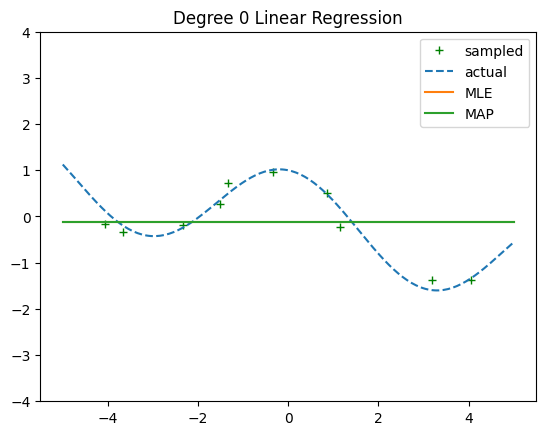

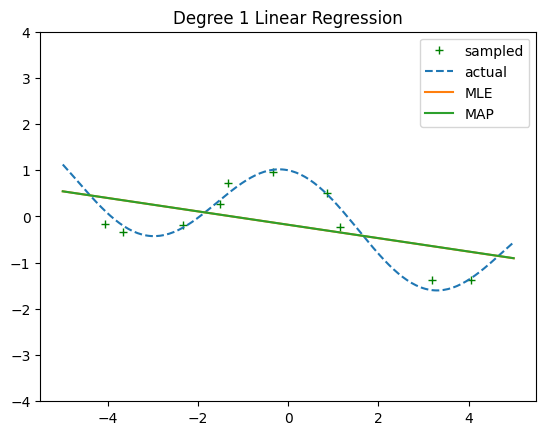

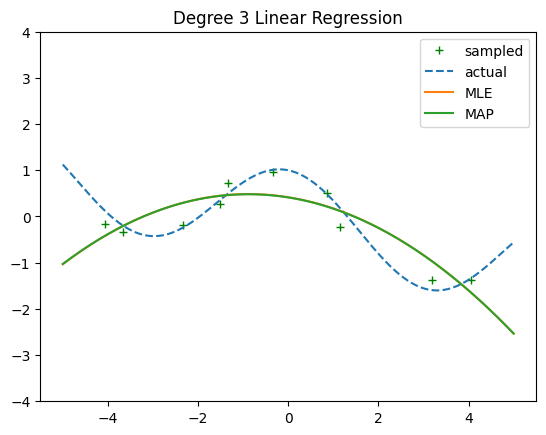

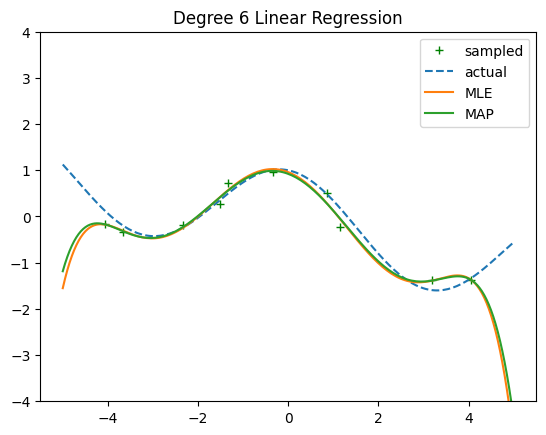

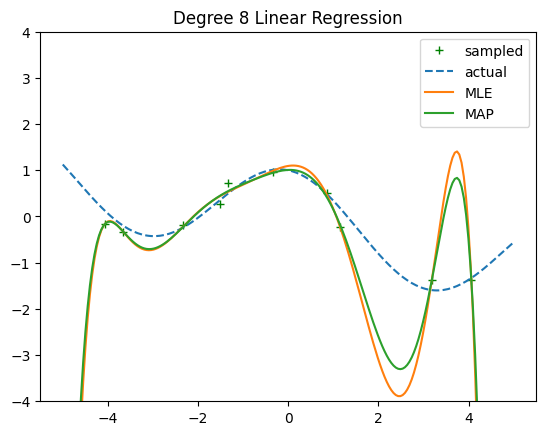

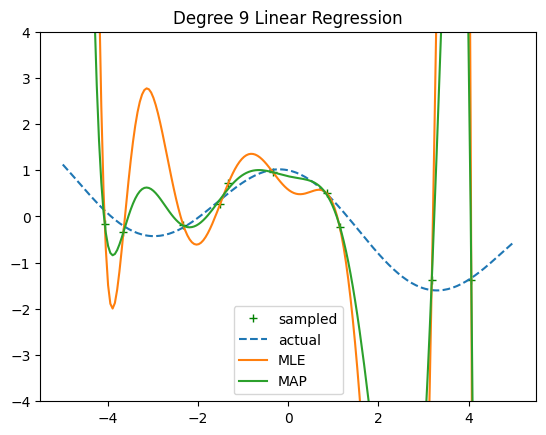

In [55]:
for deg in poly_degree:
    # Plotting boilerplate
    fig, ax = plt.subplots()
    ax.set_ylim([-4, 4])
    sampled, = ax.plot(x_pts_sample, y_pts_sample, 'g+', label="sampled")
    actual_plt, = ax.plot(x_pts, actual_hr, '--', label="actual")
    handles = [sampled, actual_plt]
    ax.set_title(f"Degree {deg} Linear Regression")
    
    # Build design matrix
    Φ = np.array([[x**j for j in range(deg+1)] for x in x_pts_sample])

    # Compute MLE model parameters and predictions
    θ = np.linalg.solve(Φ.T@Φ, Φ.T@y_pts_sample)
    y_pred = np.array([Φ[j]@θ for j, _ in enumerate(x_pts_sample)])
    
    # Compute MAP model parameters
    I_k = np.eye(Φ.shape[1])
    θ_map = np.linalg.solve(Φ.T@Φ + (σ**2/b**2)*I_k, Φ.T@y_pts_sample)
    y_pred_map = np.array([Φ[j]@θ_map for j, _ in enumerate(x_pts_sample)])
    
    print(f"for degree {deg}, avg parameter mle magnitude:\n\tMLE\t\t\tMAP")
    print(f"\t{np.mean(np.abs(θ))}\t{np.mean(np.abs(θ_map))}\n")
    
    # Computing model predictions at each point in eval set
    Φ_eval = np.array([[x**j for j in range(deg+1)] for x in x_pts])
    
    # Make predictions
    y_pred_eval = np.array([Φ_eval[j]@θ for j, _ in enumerate(x_pts)])
    y_pred_map_eval = np.array([Φ_eval[j]@θ_map for j, _ in enumerate(x_pts)])
    
    mle_handle, = ax.plot(x_pts, y_pred_eval, label="MLE")
    map_handle, = ax.plot(x_pts, y_pred_map_eval, label="MAP")
    handles.append(mle_handle)
    handles.append(map_handle)
    
    ax.legend(handles=handles, loc="best")
    plt.plot()